In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler

In [10]:
df = pd.read_csv("/home/tayal/Downloads/IPSC_Project/mnsit_train_appreal.csv")
Y = df.iloc[:,0:1]
X = df.iloc[:,1:]
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(data=X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)
Tr = X_train.values.tolist()
Tr_test = X_test.values.tolist()
y_train=pd.concat([Y_train,pd.get_dummies(Y_train['label'],prefix='label')],axis=1).drop(['label'],axis=1)
y_train_test = pd.concat([Y_test,pd.get_dummies(Y_test['label'],prefix='label')],axis=1).drop(['label'],axis=1)
Tst_tst = y_train_test.values.tolist()
Tst = y_train.values.tolist()

/home/tayal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/tayal/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))

In [12]:
def sigmoid_prime(x):
    return x*(1- x)

In [13]:
class NeuralNetwork:
    
    def __init__(self,nodes_list,learnign_rate,activation_function,activation_prime):
        self.nodes,self.learning_rate,self.act_func,self.act_func_prime=nodes_list,learnign_rate,activation_function,activation_prime
        self.layers=len(nodes_list)
        self.weights,self.biases=[],[]
        
        for i in range(self.layers-1):
            if activation_function is None:
              return
            weight_matrix = np.random.randn(nodes_list[i+1],nodes_list[i])*np.sqrt(2/nodes_list[i])
            if len(weight_matrix) == 0:
              return
            bias_matrix = np.zeros((nodes_list[i+1],1))
            
            self.weights.append(weight_matrix)
            self.wlearner = len(weight_matrix)
            self.biases.append(bias_matrix)
            self.learner = len(bias_matrix)
            if self.wlearner == 0 or self.learner==0:
              pirnt("Bad computation")
            
      
    def softmax(self, z):
          z = z - z.max(axis=0, keepdims=True)
          exp = np.nan_to_num(np.exp(z))
          return exp / exp.sum(axis=0, keepdims=True)
        
    
          
    def iterate_X(self, input_array):
        outputs=[]
        inputs=[]
        X = np.array(input_array).T
        inputs.append(X)
        i = 0
        while i < (len(self.weights)-1):
            X=np.dot(self.weights[i],X) + self.biases[i]
            X = np.vectorize(self.act_func)(X)
            outputs.append(X)
            inputs.append(X)
            i+=1
        X=np.dot(self.weights[i],X)
        X=X+self.biases[i]
        X=self.softmax(X)
        outputs.append(X)
        inputs.append(X)
        return X,inputs,outputs
      
      
    def compute_cost(self, prediction, target):
        clipped = np.clip(prediction, 1e-15, 1 - 1e-15)
        cost = target * np.log(clipped) + (1 - target) * np.log(1 - clipped)
        m = prediction.shape[1]
        xt = m
        return -np.sum(cost)/xt
  
    def feed_forward(self,input_array):
        X,inputs,outputs = self.iterate_X(input_array)
        return X
     
    def change_weights(self,inputs,outputs,target,m,predicted,errors,n):
        gradients = target-predicted
        i = n       
        while i>=0:
            if i == n:
                gradients = target-predicted
            else:
                gradients = self.act_func_prime(outputs[i])
                gradients = (errors[i]*gradients)
                gradients = gradients.reshape(len(gradients),len(gradients[0]))
                
            delta_weight = (1/m)*self.learning_rate*np.dot(gradients,inputs[i].T)
            self.weights[i]+=delta_weight
            meaner = gradients.mean(axis=1)
            self.biases[i]+=self.learning_rate*meaner.reshape(len(meaner),1)
            i-=1
      
    def train(self,input_array,target,m):
        predicted,inputs,outputs = self.iterate_X(input_array)       
        if target is None:
            print("Y is missing")
            exit(0)
        else:
            target = np.array(target).T
        errors=[]
        error = target - predicted
        n = len(self.weights)-1
        i = n
        while(i>0):
            errors.append(error)
            error  = np.dot(self.weights[i].T,error)
            i-=1
        errors.append(error)  
        
        errors=list(reversed(errors))
        
        
        self.change_weights(inputs,outputs,target,m,predicted,errors,n)
        

        


## Activation as Sigmoid

In [16]:
layer = [28*28,80,10]
nn = NeuralNetwork(layer,0.1,sigmoid,sigmoid_prime)
batch=512
epoc=[i+1 for i in range(10)]
accuracy_list = [0] * 10
for e in epoc:
    for i in range(0,10000-batch,batch):
        newbatch = i + batch
        nn.train(Tr[i:newbatch],Tst[i:newbatch],batch)
    if nn is None:
      print("Model is None")
    result = np.argmax(nn.feed_forward(Tr_test),axis=0)
    actual = np.argmax(np.array(Tst_tst).T,axis=0)
    if len(actual) == len(result):
      accuracy_list[e-1] = 1-accuracy_score(actual, result)
    else:
      print("Lenght not same")

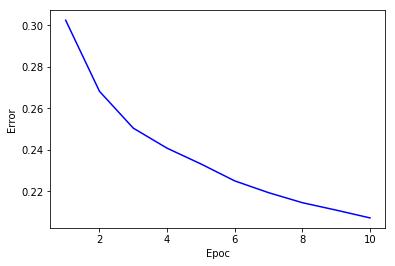

In [17]:
plt.plot(epoc, accuracy_list, color='blue')
plt.xlabel("Epoc")
plt.ylabel("Error")
plt.show()